In [1]:
# libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# import the dataset
dataset = pd.read_csv('D:\Research\BreastPath\dataset\wdbc.data')

In [3]:
x = dataset.iloc[:, 2:].values  # Extract features (columns 3 to the end)
y = dataset.iloc[:, 1].values   # Extract target (column 2)

# Encoding categorical data values 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [4]:
dataset.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize the models
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
naive_bayes_classifier = GaussianNB()
random_forest_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
svm_linear_classifier = SVC(kernel='linear', random_state=0)
svm_rbf_classifier = SVC(kernel='rbf', random_state=0)

# Fit the models
knn_classifier.fit(x_train, y_train)
naive_bayes_classifier.fit(x_train, y_train)
random_forest_classifier.fit(x_train, y_train)
svm_linear_classifier.fit(x_train, y_train)
svm_rbf_classifier.fit(x_train, y_train)

# Evaluate each model's accuracy on the test set
knn_accuracy = knn_classifier.score(x_test, y_test)
naive_bayes_accuracy = naive_bayes_classifier.score(x_test, y_test)
random_forest_accuracy = random_forest_classifier.score(x_test, y_test)
svm_linear_accuracy = svm_linear_classifier.score(x_test, y_test)
svm_rbf_accuracy = svm_rbf_classifier.score(x_test, y_test)

# Print the accuracies
print("K-NN Accuracy:", knn_accuracy)
print("Naive Bayes Accuracy:", naive_bayes_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("SVM (Linear) Accuracy:", svm_linear_accuracy)
print("SVM (RBF) Accuracy:", svm_rbf_accuracy)

K-NN Accuracy: 0.9225352112676056
Naive Bayes Accuracy: 0.9366197183098591
Random Forest Accuracy: 0.9577464788732394
SVM (Linear) Accuracy: 0.9507042253521126
SVM (RBF) Accuracy: 0.9014084507042254


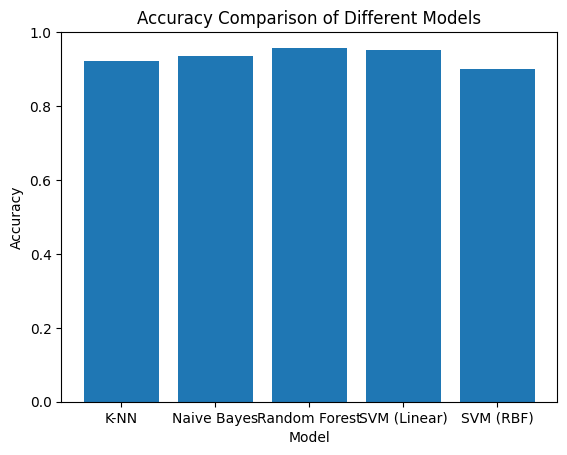

In [7]:
accuracies = [knn_accuracy, naive_bayes_accuracy, random_forest_accuracy, svm_linear_accuracy, svm_rbf_accuracy]
model_names = ['K-NN', 'Naive Bayes', 'Random Forest', 'SVM (Linear)', 'SVM (RBF)']

# Plot the accuracies
plt.bar(model_names, accuracies)
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.show()

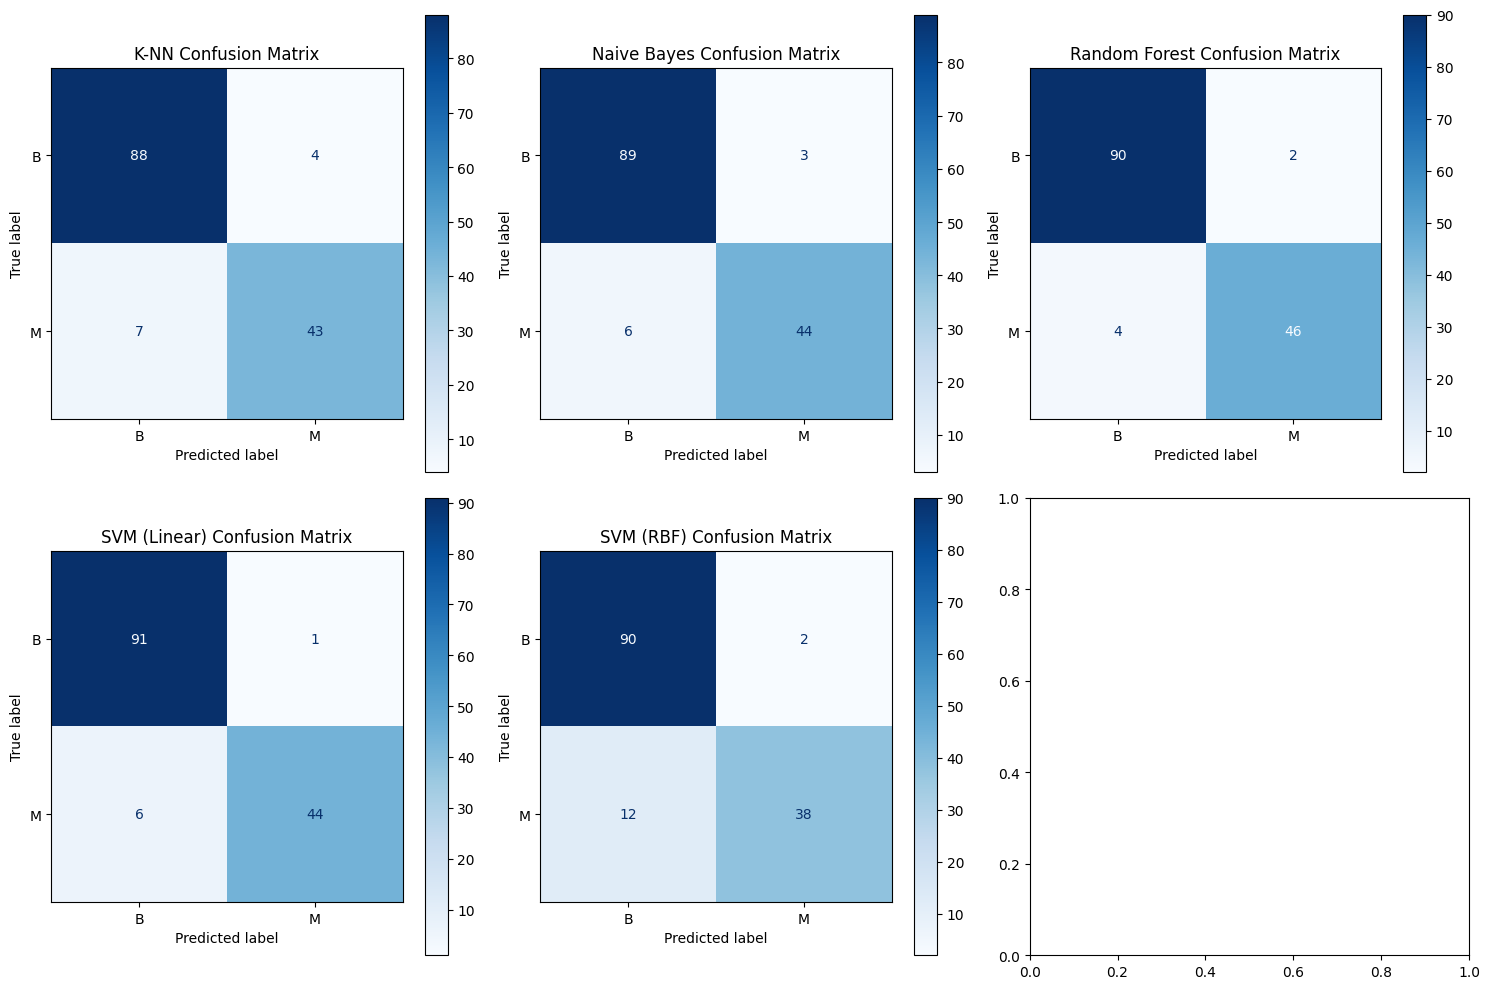

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Calculate confusion matrices for each model
conf_matrix_knn = confusion_matrix(y_test, knn_classifier.predict(x_test))
conf_matrix_nb = confusion_matrix(y_test, naive_bayes_classifier.predict(x_test))
conf_matrix_rf = confusion_matrix(y_test, random_forest_classifier.predict(x_test))
conf_matrix_svm_linear = confusion_matrix(y_test, svm_linear_classifier.predict(x_test))
conf_matrix_svm_rbf = confusion_matrix(y_test, svm_rbf_classifier.predict(x_test))

# Create subplots and axes objects
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot confusion matrices
ConfusionMatrixDisplay(conf_matrix_knn, display_labels=label_encoder.classes_).plot(cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title("K-NN Confusion Matrix")
ConfusionMatrixDisplay(conf_matrix_nb, display_labels=label_encoder.classes_).plot(cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title("Naive Bayes Confusion Matrix")
ConfusionMatrixDisplay(conf_matrix_rf, display_labels=label_encoder.classes_).plot(cmap='Blues', ax=axes[0, 2])
axes[0, 2].set_title("Random Forest Confusion Matrix")
ConfusionMatrixDisplay(conf_matrix_svm_linear, display_labels=label_encoder.classes_).plot(cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title("SVM (Linear) Confusion Matrix")
ConfusionMatrixDisplay(conf_matrix_svm_rbf, display_labels=label_encoder.classes_).plot(cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title("SVM (RBF) Confusion Matrix")

# Remove the empty subplot (if any)
if conf_matrix_svm_rbf.shape[0] != conf_matrix_svm_rbf.shape[1]:
    axes[1, 2].remove()

plt.tight_layout()
plt.show()


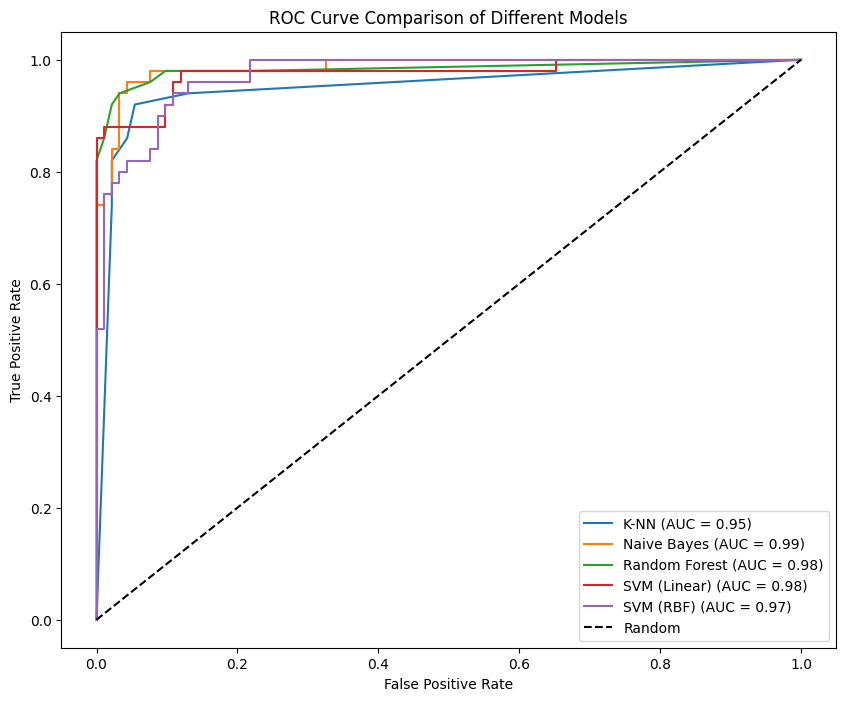

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC for each model
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_classifier.predict_proba(x_test)[:, 1])
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, naive_bayes_classifier.predict_proba(x_test)[:, 1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, random_forest_classifier.predict_proba(x_test)[:, 1])
fpr_svm_linear, tpr_svm_linear, thresholds_svm_linear = roc_curve(y_test, svm_linear_classifier.decision_function(x_test))
fpr_svm_rbf, tpr_svm_rbf, thresholds_svm_rbf = roc_curve(y_test, svm_rbf_classifier.decision_function(x_test))

# Calculate AUC scores
auc_knn = roc_auc_score(y_test, knn_classifier.predict_proba(x_test)[:, 1])
auc_nb = roc_auc_score(y_test, naive_bayes_classifier.predict_proba(x_test)[:, 1])
auc_rf = roc_auc_score(y_test, random_forest_classifier.predict_proba(x_test)[:, 1])
auc_svm_linear = roc_auc_score(y_test, svm_linear_classifier.decision_function(x_test))
auc_svm_rbf = roc_auc_score(y_test, svm_rbf_classifier.decision_function(x_test))

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_knn, tpr_knn, label=f'K-NN (AUC = {auc_knn:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_svm_linear, tpr_svm_linear, label=f'SVM (Linear) (AUC = {auc_svm_linear:.2f})')
plt.plot(fpr_svm_rbf, tpr_svm_rbf, label=f'SVM (RBF) (AUC = {auc_svm_rbf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Different Models')
plt.legend(loc='lower right')
plt.show()

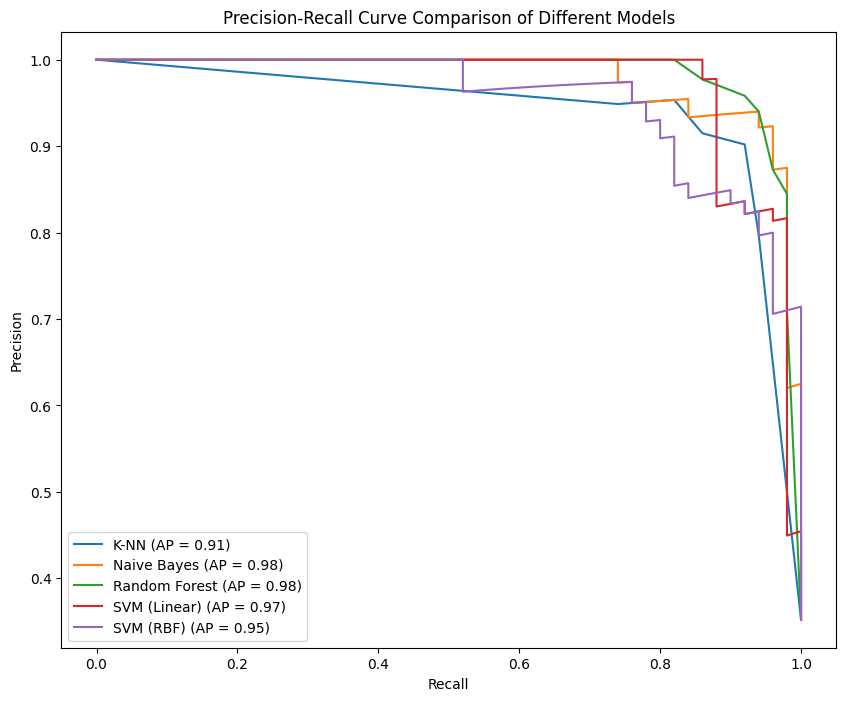

In [10]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision-recall curve and average precision for each model
precision_knn, recall_knn, _ = precision_recall_curve(y_test, knn_classifier.predict_proba(x_test)[:, 1])
precision_nb, recall_nb, _ = precision_recall_curve(y_test, naive_bayes_classifier.predict_proba(x_test)[:, 1])
precision_rf, recall_rf, _ = precision_recall_curve(y_test, random_forest_classifier.predict_proba(x_test)[:, 1])
precision_svm_linear, recall_svm_linear, _ = precision_recall_curve(y_test, svm_linear_classifier.decision_function(x_test))
precision_svm_rbf, recall_svm_rbf, _ = precision_recall_curve(y_test, svm_rbf_classifier.decision_function(x_test))

# Calculate average precision scores
ap_knn = average_precision_score(y_test, knn_classifier.predict_proba(x_test)[:, 1])
ap_nb = average_precision_score(y_test, naive_bayes_classifier.predict_proba(x_test)[:, 1])
ap_rf = average_precision_score(y_test, random_forest_classifier.predict_proba(x_test)[:, 1])
ap_svm_linear = average_precision_score(y_test, svm_linear_classifier.decision_function(x_test))
ap_svm_rbf = average_precision_score(y_test, svm_rbf_classifier.decision_function(x_test))

# Plot precision-recall curves
plt.figure(figsize=(10, 8))
plt.plot(recall_knn, precision_knn, label=f'K-NN (AP = {ap_knn:.2f})')
plt.plot(recall_nb, precision_nb, label=f'Naive Bayes (AP = {ap_nb:.2f})')
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AP = {ap_rf:.2f})')
plt.plot(recall_svm_linear, precision_svm_linear, label=f'SVM (Linear) (AP = {ap_svm_linear:.2f})')
plt.plot(recall_svm_rbf, precision_svm_rbf, label=f'SVM (RBF) (AP = {ap_svm_rbf:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison of Different Models')
plt.legend(loc='lower left')
